In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Pull Data

In [2]:
path = "C:/Users/Akis/OneDrive/Masters/Web Economics/Data/"
test_df = pd.read_csv(path+'test.csv')
train_df = pd.read_csv(path+'train.csv')
validation_df = pd.read_csv(path+'validation.csv')

In [3]:
pd.set_option('display.max_columns', None)

## Preparation

In [4]:
validation_df['OurBid']=500 #adds column with a constant bidding value

In [5]:
minBid=np.min(validation_df["payprice"].values)
print("Min Bid is:",minBid)
maxBid=np.max(validation_df["payprice"].values)
print("Max Bid is:",maxBid)
custRange=x = np.arange(minBid+1, maxBid+2,10) # determines the range that bids should be in

Min Bid is: 0
Max Bid is: 300


In [6]:
resultsDF = pd.DataFrame(columns=['Strategy','CTR', 'Clicks', 'Spend', 'CPM', 'CPC'])
#print(resultsDF)

## Constant Bidding Strategy

#### Evaluate All Constant Bidding Strategies

In [7]:
CTRArray=[]
ImpressionsArray=[]
ClicksArray=[]
SpendArray=[]
CostPerClickArray=[]
CostPerMilleArray=[]

for ConstantBid in custRange:
    validation_df['OurBid']=ConstantBid
    trueValues = (validation_df["payprice"]<validation_df["OurBid"])
    impressions = validation_df[trueValues].shape[0]
    clicks = np.sum(validation_df[trueValues]["click"].values)
    spend = np.sum(validation_df[trueValues]["payprice"].values)
    CostPerClick = spend/clicks
    CostPerMille = spend*1000/(impressions)
    ClickThroughRate=(clicks*100)/impressions
    
    CTRArray.append(ClickThroughRate)
    ImpressionsArray.append(impressions)
    ClicksArray.append(clicks)
    SpendArray.append(spend)
    CostPerClickArray.append(CostPerClick)
    CostPerMilleArray.append(CostPerMille)

#Next lines are needed so that null values in heatmap can be kept close to the minimum value (messes up colours otherwise)
minCTR=np.min(CTRArray)
minImp=np.min(ImpressionsArray)
minClicks=np.min(ClicksArray)
minSpend=np.min(SpendArray)
minCPC=np.min(CostPerClickArray)
minCPM=np.min(CostPerMilleArray)

C:\Users\Akis\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Akis\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


#### Plot Results

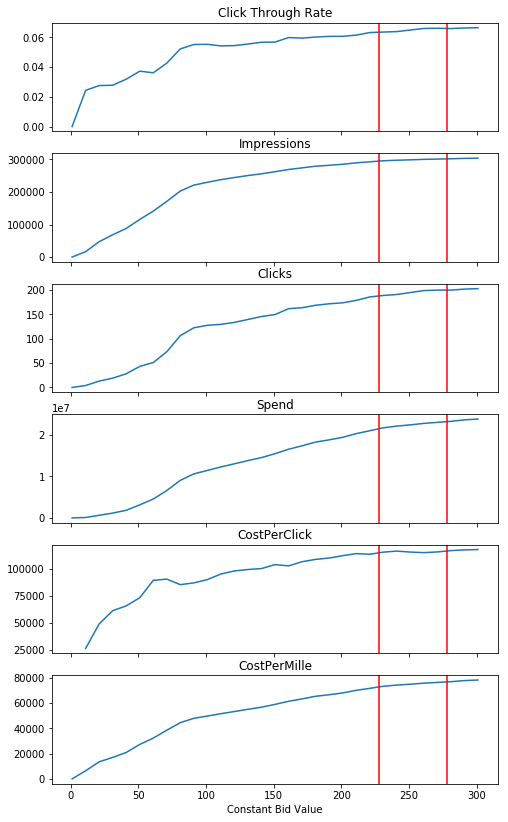

In [8]:
metrics = [CTRArray,ImpressionsArray,ClicksArray,SpendArray,CostPerClickArray,CostPerMilleArray]
metricNames = ['Click Through Rate','Impressions','Clicks','Spend','CostPerClick','CostPerMille']


f, axarr = plt.subplots(len(metrics), sharex=True, figsize=(8, 14))
i=0
for metric in metrics:
    #print(metric)
    axarr[i].plot(custRange, metric)
    axarr[i].set_title(metricNames[i])
    axarr[i].axvline(x=228,color='red')
    axarr[i].axvline(x=278,color='red')
    i+=1

axarr[i-1].set(xlabel="Constant Bid Value")
     
# Bring subplots close to each other.
f.subplots_adjust(wspace=0.3)

We conclude that the best constant value to bid is 278 in terms of CTR. 242 is a reasonable value too as similar CTR and CPC are achieved. The choice between the two is mainly based on how much we would like to spend in total.

In [9]:
i=278-1-minBid
arow2 = ['Constant', CTRArray[i], ClicksArray[i], SpendArray[i], CostPerMilleArray[i], CostPerClickArray[i]]
resultsDF.loc[len(resultsDF)] = arow2 
print(resultsDF)

IndexError: list index out of range

## Bounded Random Bidding Strategy

#### Create Numpy's to contain evaluation results

In [10]:
custRangeL=custRange.shape[0]
CTRArray2D=np.empty([custRangeL, custRangeL])
ImpressionsArray2D=np.empty([custRangeL, custRangeL])
ClicksArray2D=np.empty([custRangeL, custRangeL])
SpendArray2D=np.empty([custRangeL, custRangeL])
CostPerClickArray2D=np.empty([custRangeL, custRangeL])
CostPerMilleArray2D=np.empty([custRangeL, custRangeL])

#### Evaluate Bounded Random Bidding Strategy

In [11]:
#print(custRange)
x=0
for minimumBid in custRange:
    y=custRangeL-1
    for maximumBid in custRange: #maxBid>minBid?????
        if maximumBid>minimumBid:
            validation_df['OurBid']=randint(minimumBid, maximumBid+1)
            trueValues = (validation_df["payprice"]<validation_df["OurBid"])
            impressions = validation_df[trueValues].shape[0]
            clicks = np.sum(validation_df[trueValues]["click"].values)
            spend = np.sum(validation_df[trueValues]["payprice"].values)
            CostPerClick = spend/clicks
            CostPerMille = spend*1000/(impressions)
            ClickThroughRate=(clicks*100)/impressions
        
        else:
            impressions = minImp*0.90
            clicks = minClicks*0.90
            spend = minSpend*0.90
            CostPerClick = minCPC*0.90
            CostPerMille = minCPM*0.90
            ClickThroughRate = minCTR*0.90
        

        CTRArray2D[y][x]=ClickThroughRate
        ImpressionsArray2D[y][x]=int(impressions)
        ClicksArray2D[y][x]=clicks
        SpendArray2D[y][x]=spend
        CostPerClickArray2D[y][x]=CostPerClick
        CostPerMilleArray2D[y][x]=CostPerMille
        #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
        #print("x=",x,"y=",y)
        y-=1
    x+=1

C:\Users\Akis\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in longlong_scalars


#### Evaluate Bounded Random Bidding Strategy (Repeat to find averages)

In [12]:
for n in range(1,10,1):  
    print("Randomisation ",n,"/9 being processed...")
    x=0
    for minimumBid in custRange:
        y=custRangeL-1
        for maximumBid in custRange: #maxBid>minBid?????
            if maximumBid>minimumBid:
                validation_df['OurBid']=randint(minimumBid, maximumBid+1)
                trueValues = (validation_df["payprice"]<validation_df["OurBid"])
                impressions = validation_df[trueValues].shape[0]
                clicks = np.sum(validation_df[trueValues]["click"].values)
                spend = np.sum(validation_df[trueValues]["payprice"].values)
                CostPerClick = spend/clicks
                CostPerMille = spend*1000/(impressions)
                ClickThroughRate=(clicks*100)/impressions

            else:
                impressions = minImp*0.90
                clicks = minClicks*0.90
                spend = minSpend*0.90
                CostPerClick = minCPC*0.90
                CostPerMille = minCPM*0.90
                ClickThroughRate = minCTR*0.90


            CTRArray2D[y][x]=(n*CTRArray2D[y][x]+ClickThroughRate)/(n+1)
            ImpressionsArray2D[y][x]=(n*ImpressionsArray2D[y][x]+int(impressions))/(n+1)
            ClicksArray2D[y][x]=(n*ClicksArray2D[y][x]+clicks)/(n+1)
            SpendArray2D[y][x]=(n*SpendArray2D[y][x]+spend)/(n+1)
            CostPerClickArray2D[y][x]=(n*CostPerClickArray2D[y][x]+CostPerClick)/(n+1)
            CostPerMilleArray2D[y][x]=(n*CostPerMilleArray2D[y][x]+CostPerMille)/(n+1)
            #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
            #print("x=",x,"y=",y)
            y-=1
        x+=1

Randomisation  1 /9 being processed...


C:\Users\Akis\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in longlong_scalars


Randomisation  2 /9 being processed...
Randomisation  3 /9 being processed...


C:\Users\Akis\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in longlong_scalars


Randomisation  4 /9 being processed...
Randomisation  5 /9 being processed...
Randomisation  6 /9 being processed...
Randomisation  7 /9 being processed...
Randomisation  8 /9 being processed...
Randomisation  9 /9 being processed...


#### Plot Clicks Results

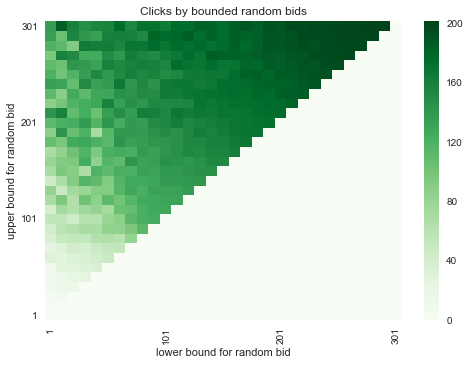

In [13]:
import seaborn as sns
ax = sns.heatmap(ClicksArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="Clicks by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

#### Plot CTR Results

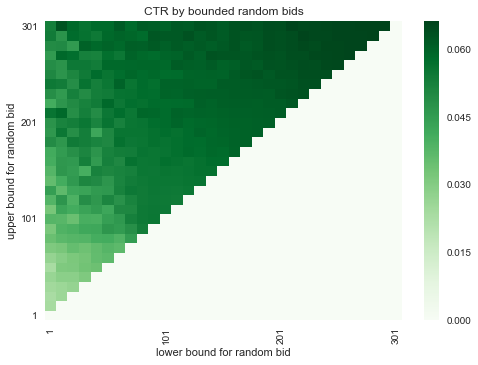

In [14]:
ax = sns.heatmap(CTRArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="CTR by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

#### Plot CPC Results

C:\Users\Akis\Anaconda3\lib\site-packages\matplotlib\colors.py:937: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


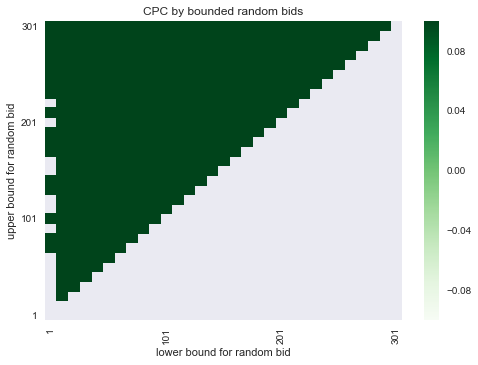

In [15]:
ax = sns.heatmap(CostPerClickArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="CPC by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

#### We can tell that the best random bidding strategy is min = [278,292] and max = [278,292]. It doesn't matter where we set the bounds between these values because there were no winning bids between these vales in the data. We can thus conclude that the random strategy is not effective. 